<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/nyandwi/machine_learning_complete/blob/main/4_real_world_data_analysis_and_preparation/1_exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
</table>

*This notebook was created by [Jean de Dieu Nyandwi](https://twitter.com/jeande_d) for the love of machine learning community. For any feedback, errors or suggestion, he can be reached on email (johnjw7084 at gmail dot com), [Twitter](https://twitter.com/jeande_d), or [LinkedIn](https://linkedin.com/in/nyandwi).*

<a name='0'></a>
# Exploratory Data Analysis (EDA)

EDA is an important step in ML project. This is where we get to dig into the data, trying to understand more about it. 

By performing EDA, we can:
* Know the summary statistics
* Spot if there are missing values and the appropriate strategy for handling it
* Spot if the data is skewed (or imbalanced)
* Correlation between features
* Understand the important features (or attributes) worth keeping and unhelpful features 
* Above all, answer some of the pressing questions about the data. These questions can be specific to data and its features but will around things like why this and this, or what could have caused this and this based on the analysis, etc...There are no right or wrong questions, the idea here is to use data to see if we can help answer some questions.

### Real World Data Exploratory Analysis : Titanic

In this lab, we will use Titanic dataset which is available on Kaggle. We can also load it from Seaborn datasets but we will use the real data from [Kaggle](https://www.kaggle.com/c/titanic/data).

Contents: 

* [1. Imports](#1)
* [2.  Loading the dataset](#2)
* [3. Quick look into the dataset](#3)
* [4. Summary statistics](#4)
* [5. Basic information](#5)
* [6. Missing data](#6)
* [7. More analysis](#7)
* [8. Checking feature correlations](#8)

<a name='1'></a>

## 1.   Imports

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<a name='2'></a>
    
## 2. Loading the dataset

In [63]:
titanic = sns.load_dataset('titanic')

If the data was coming from external sources, say `csv`, we could have used Pandas to read the file.



```
titanic = pd.read_csv('.....')
```



<a name='3'></a>
## 3. Quick Look into the dataset

In [64]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


By default, titanic.head() will display the first five rows. But you can display the rows you want, just pass the integer. Example: `titanic.head(10)`. .`tail() will display the last rows

In [65]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [66]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


<a name='4'></a>
## 4. Summary statistics

In [67]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [68]:
titanic.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<a name='5'></a>
## 5. Basic Information

1. How many people who survived and died from the titanic crash? Can you use the appropriate visualization to show these people?

In [69]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:xlabel='survived', ylabel='count'>

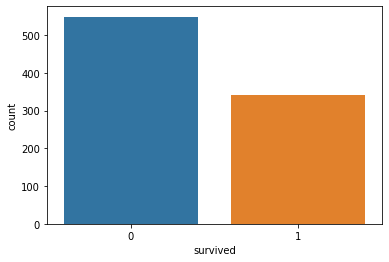

In [70]:
sns.countplot(data=titanic, x='survived')

2. How many `pclass` are there in the dataset? I it the same as the the text column `class`?

In [71]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [72]:
titanic['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [73]:
p_class = titanic[['pclass', 'class']]
p_class.head()

,pclass,class
0,3,Third
1,1,First
2,3,Third
3,1,First
4,3,Third


It seems that both of these columns are the same except that one is numeric and other is text. They basically contain the same information of the class that the passengers paid for.

3. How many genders are there in the dataset?

In [74]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

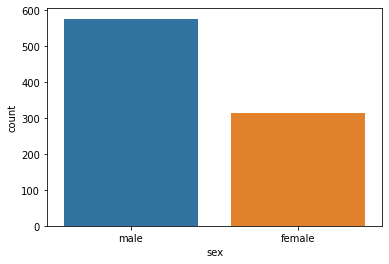

In [75]:
sns.countplot(data=titanic, x='sex')

4. Show the passengers who were less than 20 years

In [76]:
less_than_20 = titanic[titanic['age'] < 20 ]

less_than_20.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False


In [77]:
len(less_than_20)

164

5. Show the categories of the passengers in the column `who`. Use Pie chart to illustrate their values

<AxesSubplot:ylabel='who'>

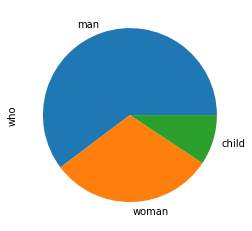

In [78]:
titanic.who.value_counts().plot(kind='pie')

6. How many unique cities are there in the column `embark_town`? Plot their occurences.

In [79]:
titanic['embark_town'].nunique()

3

<AxesSubplot:>

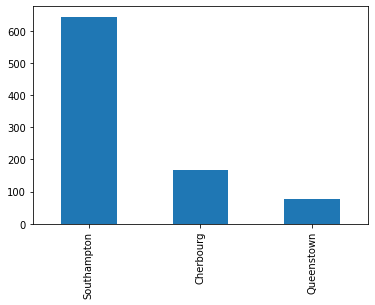

In [80]:
titanic['embark_town'].value_counts().plot(kind='bar')

There is no limit to how deep youu can go to understand the dataset.


<a name='6'></a>
## 6. Missing Data

In [81]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

There are missing data in age and deck columns. We can also use heatmaps to show the missing values

<AxesSubplot:>

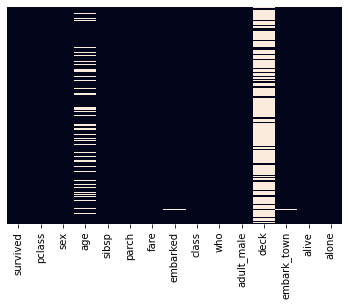

In [82]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False)

<a name='7'></a>
## 7. More Analysis

<AxesSubplot:xlabel='survived', ylabel='count'>

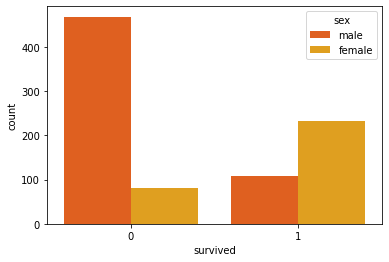

In [83]:
sns.countplot(data=titanic, x='survived', palette='autumn', hue='sex')

<AxesSubplot:xlabel='survived', ylabel='count'>

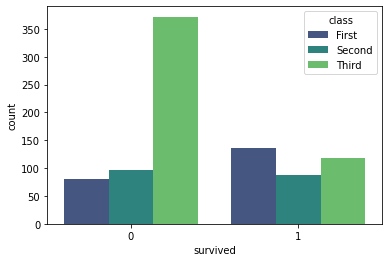

In [84]:
sns.countplot(data=titanic, x='survived', palette='viridis', hue='class')

<AxesSubplot:ylabel='Frequency'>

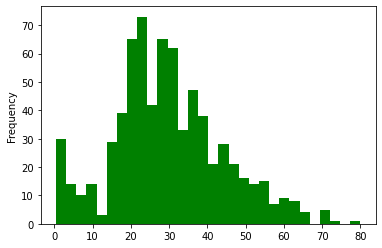

In [85]:
titanic.age.plot(kind='hist',bins=30,color='green')

<AxesSubplot:xlabel='age', ylabel='fare'>

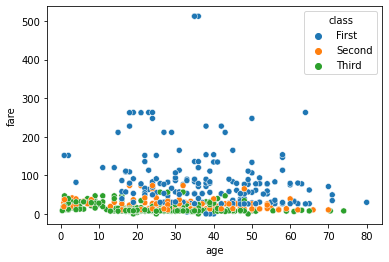

In [86]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='class')

That is obvious. The passengers who were in the first class paid more than other classes. And many females were in the first class.

<AxesSubplot:xlabel='age', ylabel='fare'>

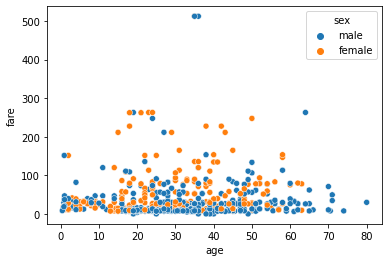

In [87]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex')

The purpose of this lab was to learn about the exploratory analysis. There is no limit to what you can do. The more time you spend with the data, the good your analysis will be. I used questions to make it simple and lead the way but there is no proper format for this. The goal is to be one with data (CC: Andrej). 

<a name='8'></a>

## 8. Checking Correlating Features

Checking correlation can help you to see the similarity between features. If two features correlate, that means they contain the same information and if one of them is removed, the analysis/model can be less affected. 

In [88]:
correlation = titanic.corr()
correlation

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [89]:
correlation['survived']

survived      1.000000
pclass       -0.338481
age          -0.077221
sibsp        -0.035322
parch         0.081629
fare          0.257307
adult_male   -0.557080
alone        -0.203367
Name: survived, dtype: float64

If you want to check how the features correlate with the label (`survived`, just for example), here is how to do it:

<AxesSubplot:>

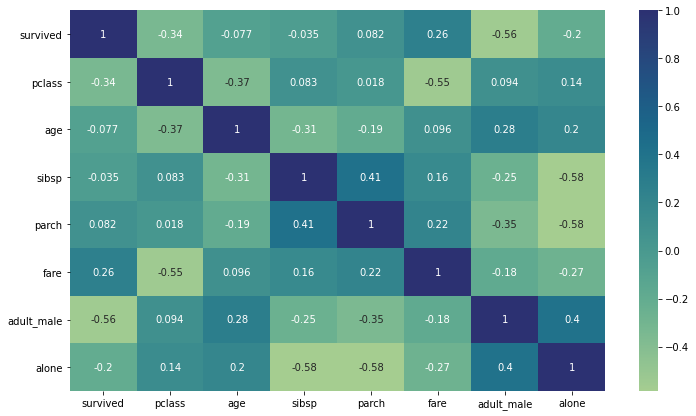

In [90]:
#### Visualizing correlation

plt.figure(figsize=(12,7))

sns.heatmap(correlation,annot=True,cmap='crest')

This is the end of the lab!

[Back to top](#0)